# 🧪 PyTorch Lab 4: Autoencoder 


## 0) Setup


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print('PyTorch version:', torch.__version__)

PyTorch version: 2.8.0+cpu


## 1) Data: load Fashion-MNIST, visualize, create Dataloader and add device
**Exercise 1** — Follow the previous lab to load format data and add the device

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Using cpu device


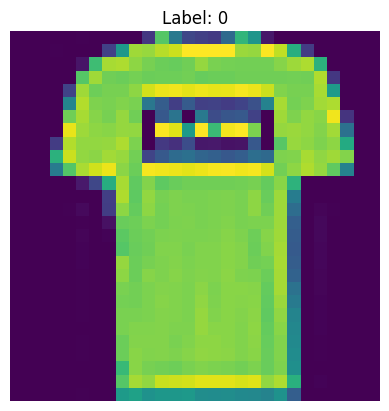

In [2]:
training_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)
len(training_data), len(test_data)

x0, y0 = training_data[1]
plt.imshow(x0[0].numpy())
plt.title(f"Label: {y0}")
plt.axis('off')

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

## 2) Model: a tiny autoencoder
We’ll encode 28×28 images → 2D latent, then decode back to 28×28.

**Exercise 4.1** — Implement the following architecture:
- Encoder: Linear(784→256) → Tanh → Linear(256→2)
- Decoder: Linear(2→256) → Tanh → Linear(256→512) → ReLU → Linear(512→784)

Return the output reshaped to the original image shape.


In [3]:
# TODO: Exercise 4.1 — implement the autoencoder
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.Tanh(),
            nn.Linear(256, 2),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 256),
            nn.Tanh(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
        )
    def forward(self, x):
        initial_shape = x.shape
        x = self.flatten(x)
        x = self.encoder(x)
        x = self.decoder(x)
        return x.view(initial_shape)

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): Tanh()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


## 3) Loss and Optimizer
**Exercise 3.1** — Use MSE loss to measure reconstruction error. Choose Adam with learning rate 1e-3.


In [4]:
# TODO: Exercise 5.1 — define loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## 4) Training & Evaluation loops
**Exercise 4.1** — Implement a standard training loop.

**Exercise 4.2** — Implement a simple test loop computing average reconstruction loss.


In [5]:
# TODO: Exercise 6.1 — training loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, _) in enumerate(dataloader):
        X = X.to(device)
        X2 = model(X)
        loss = loss_fn(X2, X)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss_item = loss.item()
            current = batch * len(X)
            print(f"loss: {loss_item:>7f}  [{current:>5d}/{size:>5d}]")

# TODO: Exercise 6.2 — test loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X, _ in dataloader:
            X = X.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, X).item()
    test_loss /= num_batches
    print(f"Test Avg loss: {test_loss:>8f}")

**Exercise 4.3** — Train for a few epochs (e.g., 5) and observe the printed losses.

In [6]:
# TODO: Exercise 6.3 — run training
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.215065  [    0/60000]
loss: 0.037582  [ 6400/60000]
loss: 0.038421  [12800/60000]
loss: 0.037674  [19200/60000]
loss: 0.037383  [25600/60000]
loss: 0.035864  [32000/60000]
loss: 0.032932  [38400/60000]
loss: 0.031998  [44800/60000]
loss: 0.033261  [51200/60000]
loss: 0.035333  [57600/60000]
Test Avg loss: 0.032327
Epoch 2
-------------------------------
loss: 0.035723  [    0/60000]
loss: 0.035478  [ 6400/60000]
loss: 0.028096  [12800/60000]
loss: 0.030139  [19200/60000]
loss: 0.033301  [25600/60000]
loss: 0.029598  [32000/60000]
loss: 0.031737  [38400/60000]
loss: 0.032981  [44800/60000]
loss: 0.028846  [51200/60000]
loss: 0.027828  [57600/60000]
Test Avg loss: 0.029924
Epoch 3
-------------------------------
loss: 0.028597  [    0/60000]
loss: 0.030808  [ 6400/60000]
loss: 0.029896  [12800/60000]
loss: 0.027801  [19200/60000]
loss: 0.036149  [25600/60000]
loss: 0.029596  [32000/60000]
loss: 0.032307  [38400/60000]
loss: 0.027174  [44800

## 5) Qualitative check — show input vs reconstruction
**Exercise 5.1** — Plot a few inputs and their reconstructions side-by-side.

Hint: Turn off gradients with `torch.no_grad()` and move tensors to CPU for plotting.

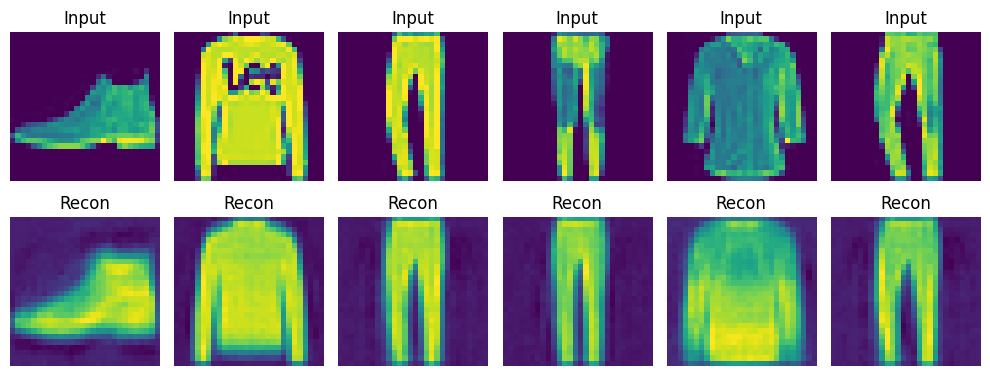

In [7]:
# TODO: Exercise 5.1 — visualize reconstructions
model.eval()
X_batch, _ = next(iter(test_dataloader))
with torch.no_grad():
    X_rec = model(X_batch.to(device)).cpu()

k = 6
plt.figure(figsize=(10, 4))
for i in range(k):
    # originals
    plt.subplot(2, k, i+1)
    plt.imshow(X_batch[i,0].numpy())
    plt.title("Input")
    plt.axis('off')
    # reconstructions
    plt.subplot(2, k, k+i+1)
    plt.imshow(X_rec[i,0].numpy())
    plt.title("Recon")
    plt.axis('off')
plt.tight_layout()